<a href="https://colab.research.google.com/github/zaheerhussain10/Neural_networks_with_tensorflow/blob/main/Nueral_network_for_recognize_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

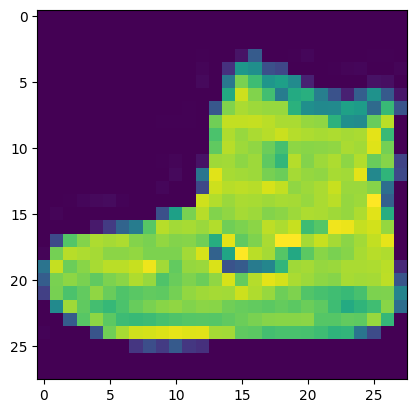

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
training_images=training_images/255.0
test_images=test_images/255.0

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0917 - accuracy: 0.6580
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6374 - accuracy: 0.7710
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5617 - accuracy: 0.7991
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5213 - accuracy: 0.8158
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4943 - accuracy: 0.8251


In [22]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5097 - accuracy: 0.8178


[0.5096819400787354, 0.817799985408783]

# **Exercise-1**

In [24]:
classifications=model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[1.7819929e-06 4.7173437e-08 8.5074953e-06 1.2155840e-05 8.9720388e-06
 1.7785946e-01 2.6919341e-05 3.7427667e-01 6.5389834e-03 4.4126651e-01]
9


# **Example of Callback function**

In [26]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4770 - accuracy: 0.8301
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3597 - accuracy: 0.8694
Reached 95% accuracy so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3598 - accuracy: 0.8694
